## Programação Inteira e Otimização em Redes


***Problema do Caixeiro Viajante***

**Autor:** Guilherme Cadori

**Data:** 02/09/2023

#### 1) Gerando Instâncias

In [1]:
# Importando bibliotecas de trabalho
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import random as rdm
import gurobipy as gp
import time
import pandas as pd


Nós da Instância I: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
Nós da Instância II: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Nós da Instância III: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


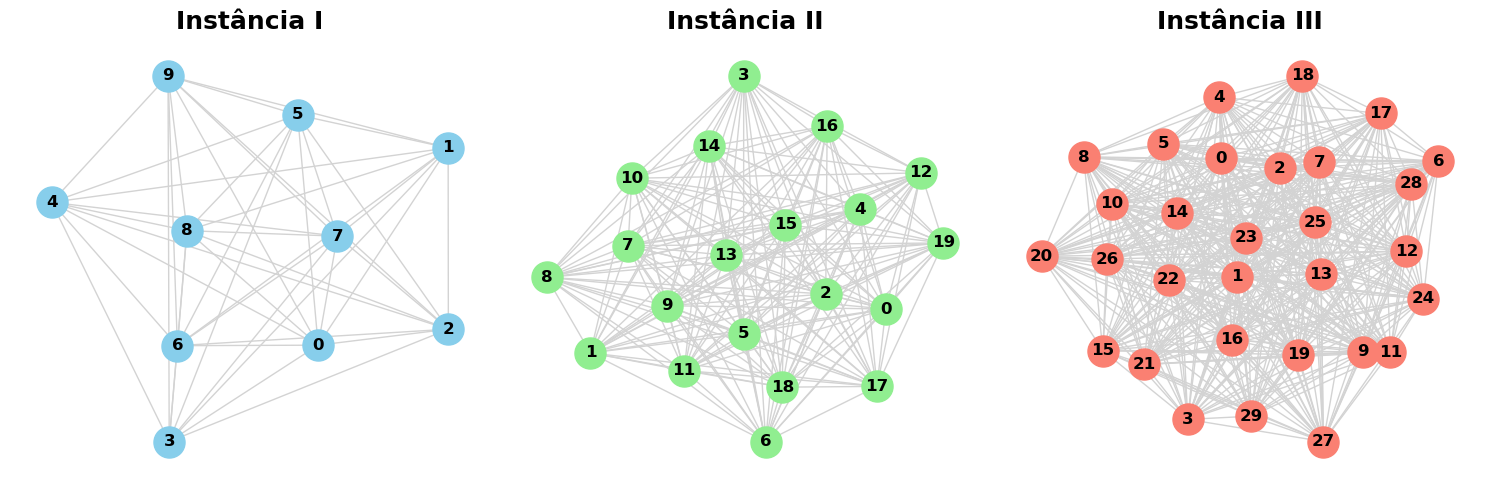

In [2]:
# Fixando parâmetro para geração de pontos aletórios para garantir reproducibilidade
np.random.seed(12345)

## Criando instância de 10 pontos aletórios
# Quantidade de nós
nodesInst1 = 10

inst1 = nx.complete_graph(nodesInst1)

# Adicionando pesos aos arcos
for (u, v) in inst1.edges():
    inst1.edges[u, v]['weight'] = round(rdm.random(), 2)*100

# Criando IDs para cada nó
node_ids1 = [node for node in inst1.nodes()]

print('Nós da Instância I:', node_ids1)

## Criando instância de 20 pontos aletórios
# Quantidade de nós
nodesInst2 = 20

inst2 = nx.complete_graph(nodesInst2)

# Adicionando pesos aos arcos
for (u, v) in inst2.edges():
    inst2.edges[u, v]['weight'] = round(rdm.random(), 2)*100

# Criando IDs para cada nó
node_ids2 = [node for node in inst2.nodes()]

print('Nós da Instância II:', node_ids2)

## Criando instância de 30 pontos aleatórios
# Quantidade de nós
nodesInst3 = 30

inst3 = nx.complete_graph(nodesInst3)

# Adicionando pesos aos arcos
for (u, v) in inst3.edges():
    inst3.edges[u, v]['weight'] = round(rdm.random(), 2)*100

# Criando IDs para cada nó
node_ids3 = [node for node in inst3.nodes()]

print('Nós da Instância III:', node_ids3)

# Criando figura com sub-gráficos
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plotando todas as instâncias em forma rede
# Grafo 1
graph1 = nx.draw(inst1,
                 with_labels=True,
                 node_size=500,
                 node_color='skyblue', 
                 edge_color='lightgray',
                 font_weight='bold',
                 ax=axes[0])

axes[0].set_title('Instância I', fontsize=18, fontweight='bold')

# Grafo 2
graph2 = nx.draw(inst2,
                 with_labels=True, 
                 node_size=500,
                 node_color='lightgreen', 
                 edge_color='lightgray',
                 font_weight='bold',
                 ax=axes[1])

axes[1].set_title('Instância II', fontsize=18, fontweight='bold')

# Grafo 3
graph3 = nx.draw(inst3,
                 with_labels=True, 
                 node_size=500,
                 node_color='salmon',
                 edge_color='lightgray',
                 font_weight='bold',
                 ax=axes[2])

axes[2].set_title('Instância III', fontsize=18, fontweight='bold')

# Plotando imagem
plt.tight_layout()
plt.show()


In [3]:
# Extraindo distâncias entra cada nó para todos os grafos
edge_weights_inst1 = nx.get_edge_attributes(inst1, 'weight')
edge_weights_inst2 = nx.get_edge_attributes(inst2, 'weight')
edge_weights_inst3 = nx.get_edge_attributes(inst3, 'weight')

# Conferindo distâncias extraídas
# print(" Edge Weights for Instance 1:\n", edge_weights_inst1)
# print("\n Edge Weights for Instance 2:\n", edge_weights_inst2)
# print("\n Edge Weights for Instance 3:\n", edge_weights_inst3)


In [4]:
# Crinado matrizes de distância

# Criando função para auxiliar na criação E VISUALIZAÇÃO da matriz
def distanceMatrix(edge_weights_dict, num_nodes):
    import pandas as pd
    
    # Criando uma matriz quadrar com valores proxy antes se de ser preenchida
    distance_matrix = [[float(0)] * num_nodes for _ in range(num_nodes)]

    # Preenchendo a matriz com o valores reais
    # Assumindo que se trata de um grafo completo não direcionado
    for (u, v), weight in edge_weights_dict.items():
        distance_matrix[u - 1][v - 1] = weight
        distance_matrix[v - 1][u - 1] = weight 
        
    # Criando um pandas dataframe para armazenar as distâncias
    df = pd.DataFrame(distance_matrix)

    return df

# Criando função para auxiliar na criação da matriz
def distanceMatrixDados(edge_weights_dict, num_nodes):
   
    # Criando uma matriz quadrar com valores proxy antes se de ser preenchida
    distance_matrix = [[float(0)] * num_nodes for _ in range(num_nodes)]

    # Preenchendo a matriz com o valores reais
    # Assumindo que se trata de um grafo completo não direcionado
    for (u, v), weight in edge_weights_dict.items():
        distance_matrix[u - 1][v - 1] = weight
        distance_matrix[v - 1][u - 1] = weight 
        
    return distance_matrix


# Criando matrizes de distâncias em objetos
matDist1 = distanceMatrixDados(edge_weights_inst1, nodesInst1)
matDist2 = distanceMatrixDados(edge_weights_inst2, nodesInst2)
matDist3 = distanceMatrixDados(edge_weights_inst3, nodesInst3)

matDist1Df = distanceMatrix(edge_weights_inst1, nodesInst1)
matDist2Df = distanceMatrix(edge_weights_inst2, nodesInst2)
matDist3Df = distanceMatrix(edge_weights_inst3, nodesInst3)

# # Retornando matriz de distâncias para fins de verificação
print(" Matriz de Distâncias para Instância 1:\n")
distanceMatrix(edge_weights_inst1, nodesInst1)

# # print("\n Matriz de Distâncias para Instância 2:\n")
# distanceMatrix(edge_weights_inst2, nodesInst2)

# # print("\n Matriz de Distâncias para Instância 3:\n")
# distanceMatrix(edge_weights_inst3, nodesInst3)


 Matriz de Distâncias para Instância 1:



,0,1,2,3,4,5,6,7,8,9
0,0.0,81.0,2.0,33.0,54.0,38.0,43.0,56.0,35.0,27.0
1,81.0,0.0,35.0,8.0,24.0,100.0,61.0,35.0,36.0,75.0
2,2.0,35.0,0.0,55.0,23.0,92.0,60.0,79.0,4.0,86.0
3,33.0,8.0,55.0,0.0,66.0,68.0,15.0,60.0,95.0,32.0
4,54.0,24.0,23.0,66.0,0.0,5.0,91.0,62.0,86.0,96.0
5,38.0,100.0,92.0,68.0,5.0,0.0,73.0,97.0,26.0,55.0
6,43.0,61.0,60.0,15.0,91.0,73.0,0.0,83.0,55.0,38.0
7,56.0,35.0,79.0,60.0,62.0,97.0,83.0,0.0,46.0,46.0
8,35.0,36.0,4.0,95.0,86.0,26.0,55.0,46.0,0.0,38.0
9,27.0,75.0,86.0,32.0,96.0,55.0,38.0,46.0,38.0,0.0


#### 2) Modelo matemático com restrição de sub-rota de Dantzig

##### Instância I

In [5]:
#### Registrando tempo de início
start_time = time.time()

# Criando o modelo
m1 = gp.Model()

# Criando variávies: nesse caso todos o nós são adjacente entre si
variables = m1.addVars(edge_weights_inst1.keys(), 
                     obj=edge_weights_inst1,
                     vtype=gp.GRB.BINARY,
                     name='x')

# Direções simétricas: copiando objeto
for u, v in edge_weights_inst1.keys():
    variables[v, u] = variables[u, v] # mesmo arco porém na direção oposta

# Criando restrições
# Em cada nó pode haver somente dois arcos selecionados - um nó de chegada e outro nó de saída
cons = m1.addConstrs(variables.sum(node,'*') == 2 for node in inst1)

# Adicionando restrições de sub-rotas de Dantzig de forma iterativa
# As restrições serão inseridas quando sub-rotas forem criadas
def subtourelim(model, where):
    # Importando biblioteca auxiliar
    from itertools import combinations
    
    if where == gp.GRB.Callback.MIPSOL:
        # Criando uma lista de arcos selecionados
        vals = model.cbGetSolution(model._vars)
        selected = gp.tuplelist((i, j) for i, j in model._vars.keys()
                             if vals[i, j] > 0.5)
        
        # Encontrando a menor subrota criada dentro da atual lista de arcos selecionados
        tour = subtour(selected)
        if len(tour) < len(node_ids1):
            # Adiciona restrição de eliminação de sub-rotas para o par de cidade na subrota
            model.cbLazy(gp.quicksum(model._vars[i, j] for i, j in combinations(tour, 2))
                         <= len(tour)-1)

# Dada uma sublista de arcos encontre a menor subrota
def subtour(edges):
    unvisited = node_ids1[:]
    cycle = node_ids1[:] # Proxy - será substituída
    while unvisited:  # 'True' se a lista não estiver vazia
        thiscycle = []
        neighbors = unvisited
        while neighbors:
            current = neighbors[0]
            thiscycle.append(current)
            unvisited.remove(current)
            neighbors = [j for i, j in edges.select(current, '*')
                         if j in unvisited]
        if len(thiscycle) <= len(cycle):
            cycle = thiscycle # Nova menor subrota
    return cycle

# Resolvendo o modelo
m1._vars = variables
m1.Params.lazyConstraints = 1
m1.optimize(subtourelim)

# Solução
vals = m1.getAttr('x', variables)
selected = gp.tuplelist((i, j) for i, j in vals.keys() if vals[i, j] > 0.5)

# Rota a ser traçada
rota1 = subtour(selected)

#### Registrando tempo de término
end_time = time.time()

#### Calculando tempo decorrido
elapsed_time_DT1 = round(end_time - start_time, 4)

#### Retorno tempo decorrido
print("\nElapsed time:", elapsed_time_DT1, "seconds")


Set parameter Username
Set parameter LazyConstraints to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 10 rows, 45 columns and 90 nonzeros
Model fingerprint: 0xa78e9dbb
Variable types: 0 continuous, 45 integer (45 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.00s
Presolved: 10 rows, 45 columns, 90 nonzeros
Variable types: 0 continuous, 45 integer (45 binary)
Found heuristic solution: objective 225.0000000

Root relaxation: objective 2.205000e+02, 14 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Ti

##### Instância II

In [6]:
#### Registrando tempo de início
start_time = time.time()

# Criando o modelo
m2 = gp.Model()

# Criando variávies: nesse caso todos o nós são adjacente entre si
variables = m2.addVars(edge_weights_inst2.keys(), 
                     obj=edge_weights_inst2,
                     vtype=gp.GRB.BINARY,
                     name='x')

# Direções simétricas: copiando objeto
for u, v in edge_weights_inst2.keys():
    variables[v, u] = variables[u, v] # mesmo arco porém na direção oposta

# Criando restrições
# Em cada nó pode haver somente dois arcos selecionados - um nó de chegada e outro nó de saída
cons = m2.addConstrs(variables.sum(node,'*') == 2 for node in inst2)

# Adicionando restrições de sub-rotas de Dantzig de forma iterativa
# As restrições serão inseridas quando sub-rotas forem criadas
def subtourelim(model, where):
    # Importando biblioteca auxiliar
    from itertools import combinations
    
    if where == gp.GRB.Callback.MIPSOL:
        # Criando uma lista de arcos selecionados
        vals = model.cbGetSolution(model._vars)
        selected = gp.tuplelist((i, j) for i, j in model._vars.keys()
                             if vals[i, j] > 0.5)
        
        # Encontrando a menor subrota criada dentro da atual lista de arcos selecionados
        tour = subtour(selected)
        if len(tour) < len(node_ids2):
            # Adiciona restrição de eliminação de sub-rotas para o par de cidade na subrota
            model.cbLazy(gp.quicksum(model._vars[i, j] for i, j in combinations(tour, 2))
                         <= len(tour)-1)

# Dada uma sublista de arcos encontre a menor subrota
def subtour(edges):
    unvisited = node_ids2[:]
    cycle = node_ids2[:] # Proxy - será substituída
    while unvisited:  # 'True' se a lista não estiver vazia
        thiscycle = []
        neighbors = unvisited
        while neighbors:
            current = neighbors[0]
            thiscycle.append(current)
            unvisited.remove(current)
            neighbors = [j for i, j in edges.select(current, '*')
                         if j in unvisited]
        if len(thiscycle) <= len(cycle):
            cycle = thiscycle # Nova menor subrota
    return cycle

# Resolvendo o modelo
m2._vars = variables
m2.Params.lazyConstraints = 1
m2.optimize(subtourelim)

# Solução
vals = m2.getAttr('x', variables)
selected = gp.tuplelist((i, j) for i, j in vals.keys() if vals[i, j] > 0.5)

# Rota a ser traçada
rota2 = subtour(selected)

#### Registrando tempo de término
end_time = time.time()

#### Calculando tempo decorrido
elapsed_time_DT2 = round(end_time - start_time, 4)

#### Retorno tempo decorrido
print("\nElapsed time:", elapsed_time_DT2, "seconds")


Set parameter LazyConstraints to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 20 rows, 190 columns and 380 nonzeros
Model fingerprint: 0x89171a71
Variable types: 0 continuous, 190 integer (190 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.00s
Presolved: 20 rows, 190 columns, 380 nonzeros
Variable types: 0 continuous, 190 integer (190 binary)
Found heuristic solution: objective 275.0000000

Root relaxation: objective 2.420000e+02, 28 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     

##### Instância III

In [7]:
#### Registrando tempo de início
start_time = time.time()

# Criando o modelo
m3 = gp.Model()

# Criando variávies: nesse caso todos o nós são adjacente entre si
variables = m3.addVars(edge_weights_inst3.keys(), 
                     obj=edge_weights_inst3,
                     vtype=gp.GRB.BINARY,
                     name='x')

# Direções simétricas: copiando objeto
for u, v in edge_weights_inst3.keys():
    variables[v, u] = variables[u, v] # mesmo arco porém na direção oposta

# Criando restrições
# Em cada nó pode haver somente dois arcos selecionados - um nó de chegada e outro nó de saída
cons = m3.addConstrs(variables.sum(node,'*') == 2 for node in inst3)

# Adicionando restrições de sub-rotas de Dantzig de forma iterativa
# As restrições serão inseridas quando sub-rotas forem criadas
def subtourelim(model, where):
    # Importando biblioteca auxiliar
    from itertools import combinations
    
    if where == gp.GRB.Callback.MIPSOL:
        # Criando uma lista de arcos selecionados
        vals = model.cbGetSolution(model._vars)
        selected = gp.tuplelist((i, j) for i, j in model._vars.keys()
                             if vals[i, j] > 0.5)
        
        # Encontrando a menor subrota criada dentro da atual lista de arcos selecionados
        tour = subtour(selected)
        if len(tour) < len(node_ids3):
            # Adiciona restrição de eliminação de sub-rotas para o par de cidade na subrota
            model.cbLazy(gp.quicksum(model._vars[i, j] for i, j in combinations(tour, 2))
                         <= len(tour)-1)

# Dada uma sublista de arcos encontre a menor subrota
def subtour(edges):
    unvisited = node_ids3[:]
    cycle = node_ids3[:] # Proxy - será substituída
    while unvisited:  # 'True' se a lista não estiver vazia
        thiscycle = []
        neighbors = unvisited
        while neighbors:
            current = neighbors[0]
            thiscycle.append(current)
            unvisited.remove(current)
            neighbors = [j for i, j in edges.select(current, '*')
                         if j in unvisited]
        if len(thiscycle) <= len(cycle):
            cycle = thiscycle # Nova menor subrota
    return cycle

# Resolvendo o modelo
m3._vars = variables
m3.Params.lazyConstraints = 1
m3.optimize(subtourelim)

# Solução
vals = m3.getAttr('x', variables)
selected = gp.tuplelist((i, j) for i, j in vals.keys() if vals[i, j] > 0.5)

# Rota a ser traçada
rota3 = subtour(selected)

#### Registrando tempo de término
end_time = time.time()

#### Calculando tempo decorrido
elapsed_time_DT3 = round(end_time - start_time, 4)

#### Retorno tempo decorrido
print("\nElapsed time:", elapsed_time_DT3, "seconds")


Set parameter LazyConstraints to value 1
Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 30 rows, 435 columns and 870 nonzeros
Model fingerprint: 0x583a599b
Variable types: 0 continuous, 435 integer (435 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+02]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Presolve time: 0.00s
Presolved: 30 rows, 435 columns, 870 nonzeros
Variable types: 0 continuous, 435 integer (435 binary)

Root relaxation: objective 2.010000e+02, 41 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  201.00000    0    -          -  201.00000    

##### Soluções das Três Instâncias

Solução das Três Instâncias

Instância 1
 Função Objetivo: R$ 222.0
 Rota a ser realizada: [0, 1, 3, 9, 6, 5, 8, 2, 4, 7]

Instância 2
 Função Objetivo: R$ 249.0
 Rota a ser realizada para Instâcia 2: [0, 1, 9, 19, 11, 3, 15, 8, 4, 12, 18, 14, 2, 7, 13, 10, 17, 6, 5, 16]

Instância 3
 Função Objetivo: R$ 202.0
 Rota a ser realizada para Instâcia 3: [0, 5, 2, 13, 26, 1, 6, 27, 4, 29, 16, 15, 11, 28, 20, 12, 9, 14, 23, 3, 7, 18, 21, 24, 10, 19, 8, 22, 17, 25]


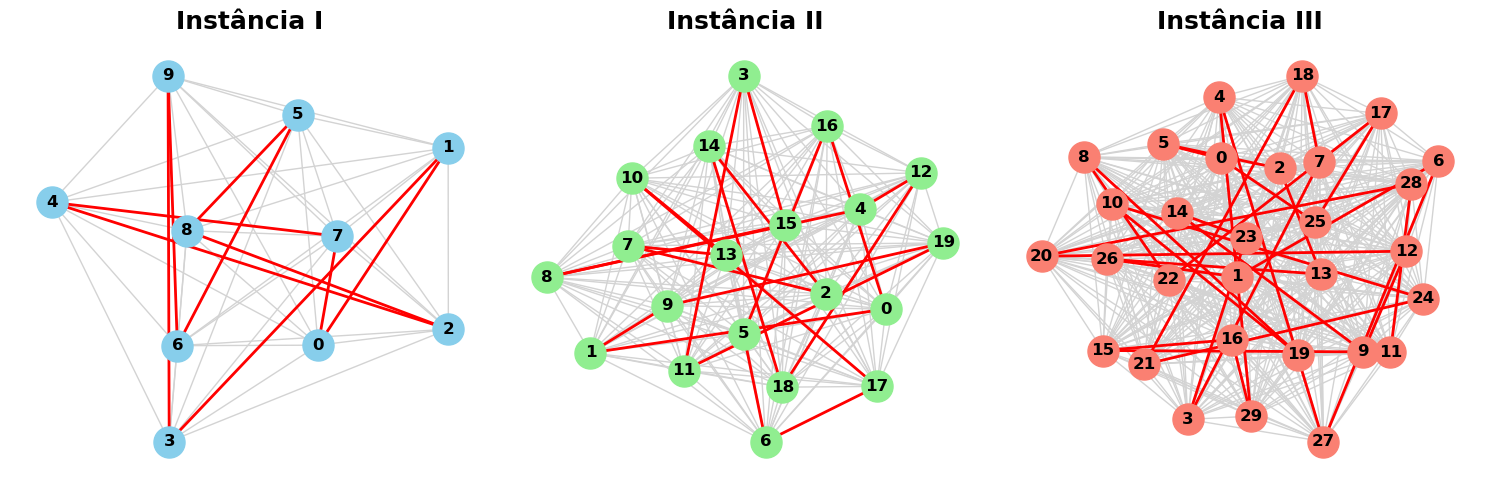

In [8]:
# Fixando parâmetro para geração de pontos aletórios para garantir reproducibilidade
np.random.seed(12345)

# Plotando a solução
# Criando figura com sub-gráficos
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

######### Plotando todas as instâncias e soluções
#### Grafo 1
pos1 = nx.spring_layout(inst1)

graph1 = nx.draw(inst1,
                 pos=pos1,
                 with_labels=True,
                 node_size=500,
                 node_color='skyblue', 
                 edge_color='lightgray',
                 font_weight='bold',
                 ax=axes[0])

axes[0].set_title('Instância I', fontsize=18, fontweight='bold')

# Create an empty list to store the edges
edges_list = []

# Iterate through the sequence and add edges between nodes
for i in range(len(rota1) - 1):
    edges_list.append((rota1[i], rota1[i + 1]))

edges_list.append((rota1[-1], rota1[0]))

# Highlight the desired sequence edges with a different color (e.g., red)
nx.draw_networkx_edges(inst1, pos=pos1, edgelist=edges_list,
                       edge_color='red', width=2.0, ax=axes[0])
    
#### Grafo 2
pos2 = nx.spring_layout(inst2)

graph2 = nx.draw(inst2,
                 pos=pos2,
                 with_labels=True, 
                 node_size=500,
                 node_color='lightgreen', 
                 edge_color='lightgray',
                 font_weight='bold',
                 ax=axes[1])

axes[1].set_title('Instância II', fontsize=18, fontweight='bold')

# Create an empty list to store the edges
edges_list2 = []

# Iterate through the sequence and add edges between nodes
for i in range(len(rota2) - 1):
    edges_list2.append((rota2[i], rota2[i + 1]))

edges_list2.append((rota2[-1], rota2[0]))

# Highlight the desired sequence edges with a different color (e.g., red)
nx.draw_networkx_edges(inst2, 
                       pos=pos2, 
                       edgelist=edges_list2,
                       edge_color='red', 
                       width=2.0, 
                       ax=axes[1])

#### Grafo 3
pos3 = nx.spring_layout(inst3)

graph3 = nx.draw(inst3,
                 pos=pos3,
                 with_labels=True, 
                 node_size=500,
                 node_color='salmon',
                 edge_color='lightgray',
                 font_weight='bold',
                 ax=axes[2])

axes[2].set_title('Instância III', fontsize=18, fontweight='bold')

# Create an empty list to store the edges
edges_list3 = []

# Iterate through the sequence and add edges between nodes
for i in range(len(rota3) - 1):
    edges_list3.append((rota3[i], rota3[i + 1]))

edges_list3.append((rota3[-1], rota3[0]))

# Highlight the desired sequence edges with a different color (e.g., red)
nx.draw_networkx_edges(inst3, 
                       pos=pos3, 
                       edgelist=edges_list3,
                       edge_color='red', 
                       width=2.0, 
                       ax=axes[2])

# Retornando valores da funções objetivo e rotas a serem traçadas
print('Solução das Três Instâncias')
print('\nInstância 1')
print(' Função Objetivo: R$', round(m1.objVal, 2))
print(' Rota a ser realizada:', rota1)
print('\nInstância 2')
print(' Função Objetivo: R$', round(m2.objVal, 2))
print(' Rota a ser realizada para Instâcia 2:', rota2)
print('\nInstância 3')
print(' Função Objetivo: R$', round(m3.objVal, 2))
print(' Rota a ser realizada para Instâcia 3:', rota3)

# Plotando imagem
plt.tight_layout()
plt.show()


**IMPORTANTE:** As visualizações acima são uma tentativa de representar a solução. As ilustrações não representam distâncias euclidinas e sim apenas representações da relação (arcos) entre nós. Este é um grafo complete, assumindo que é possível partir de qualquer e chegar diretamente a qualquer outro nó. Dessa forma, os arcos não possuem dimensões proporcionais aos seus valores (pesos dos arcos). Por tal razão apenas o valor de cada arco deve ser levado em conta na obtenção dos circuitos mínimos e não suas dimensões gráficas. Por tal razão é possível observar cruzamento de arcos, assim como dimensões gráficas não condizentes com os pesos de cada arco.

#### 3) Modelo matemático com restrição de sub-rota MTZ (Muller-Tucker-Zemlin)

##### Instância I

In [9]:
# Adptando os dados para a nova formulação
origens1 = [i for i in range(nodesInst1)]

destinos1 = [i for i in range(nodesInst1)]

custos1 = dict()
for i, origem in enumerate(origens1):
    for j, destino in enumerate(destinos1):
        custos1[origem, destino] = matDist1[i][j]

#### Registrando tempo de início
start_time = time.time()

# Criando o modelo
mtz1 = gp.Model()

# Criando variáveis de decisão
x = mtz1.addVars(origens1, destinos1, vtype=gp.GRB.BINARY)

# Criando variável já com upper bound de MTZ adicionado em sua definição
u = mtz1.addVars(origens1[1:], vtype=gp.GRB.INTEGER, ub=nodesInst1 - 1) 

# Criando a função objetivo
mtz1.setObjective(x.prod(custos1), sense=gp.GRB.MINIMIZE)

# Criando restrições de origem - cada nó só pode ser utilizado como origem uma única vez
c1 = mtz1.addConstrs(gp.quicksum(x[i, j] for j in destinos1 if i != j) == 1 for i in origens1)

# Criando restrições de destino - cada nó só pode ser visitado uma única vez
c2 = mtz1.addConstrs(gp.quicksum(x[i, j] for i in origens1 if i != j) == 1 for j in destinos1)

# Criando restrições de eleminação de subrotas de MTZ
c3 = mtz1.addConstrs(u[i] - u[j] + nodesInst1 * x[i, j] <= nodesInst1 - 1
                     for i in origens1[1:] for j in destinos1[1:] if i != j)

# Resolvendo o modelo
mtz1.optimize()

#### Registrando tempo de término
end_time = time.time()

#### Calculando tempo decorrido
elapsed_time_MTZ1 = round(end_time - start_time, 4)

#### Retorno tempo decorrido
print("\nElapsed time:", elapsed_time_MTZ1, "seconds")


Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 92 rows, 109 columns and 396 nonzeros
Model fingerprint: 0xd8e91894
Variable types: 0 continuous, 109 integer (100 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+01]
  Objective range  [2e+00, 1e+02]
  Bounds range     [1e+00, 9e+00]
  RHS range        [1e+00, 9e+00]
Presolve removed 0 rows and 10 columns
Presolve time: 0.00s
Presolved: 92 rows, 99 columns, 396 nonzeros
Variable types: 0 continuous, 99 integer (90 binary)
Found heuristic solution: objective 681.0000000
Found heuristic solution: objective 456.0000000

Root relaxation: objective 1.800000e+02, 29 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent 

##### Instância II

In [10]:
# Adptando os dados para a nova formulação
origens2 = [i for i in range(nodesInst2)]

destinos2 = [i for i in range(nodesInst2)]

custos2 = dict()
for i, origem in enumerate(origens2):
    for j, destino in enumerate(destinos2):
        custos2[origem, destino] = matDist2[i][j]

#### Registrando tempo de início
start_time = time.time()

# Criando o modelo
mtz2 = gp.Model()

# Criando variáveis de decisão
x2 = mtz2.addVars(origens2, destinos2, vtype=gp.GRB.BINARY)

# Criando variável já com upper bound de MTZ adicionado em sua definição
u2 = mtz2.addVars(origens2[1:], vtype=gp.GRB.INTEGER, ub=nodesInst2 - 1) 

# Criando a função objetivo
mtz2.setObjective(x2.prod(custos2), sense=gp.GRB.MINIMIZE)

# Criando restrições de origem - cada nó só pode ser utilizado como origem uma única vez
c12 = mtz2.addConstrs(gp.quicksum(x2[i, j] for j in destinos2 if i != j) == 1 for i in origens2)

# Criando restrições de destino - cada nó só pode ser visitado uma única vez
c22 = mtz2.addConstrs(gp.quicksum(x2[i, j] for i in origens2 if i != j) == 1 for j in destinos2)

# Criando restrições de eleminação de subrotas de MTZ
c32 = mtz2.addConstrs(u2[i] - u2[j] + nodesInst2 * x2[i, j] <= nodesInst2 - 1
                     for i in origens2[1:] for j in destinos2[1:] if i != j)

# Resolvendo o modelo
mtz2.optimize()

#### Registrando tempo de término
end_time = time.time()

#### Calculando tempo decorrido
elapsed_time_MTZ2 = round(end_time - start_time, 4)

#### Retorno tempo decorrido
print("\nElapsed time:", elapsed_time_MTZ2, "seconds")


Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 382 rows, 419 columns and 1786 nonzeros
Model fingerprint: 0xce7fc4f6
Variable types: 0 continuous, 419 integer (400 binary)
Coefficient statistics:
  Matrix range     [1e+00, 2e+01]
  Objective range  [1e+00, 1e+02]
  Bounds range     [1e+00, 2e+01]
  RHS range        [1e+00, 2e+01]
Presolve removed 0 rows and 20 columns
Presolve time: 0.02s
Presolved: 382 rows, 399 columns, 1786 nonzeros
Variable types: 0 continuous, 399 integer (380 binary)
Found heuristic solution: objective 980.0000000
Found heuristic solution: objective 755.0000000

Root relaxation: objective 2.154000e+02, 77 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Inc

##### Instância III

In [11]:
# Adptando os dados para a nova formulação
origens3 = [i for i in range(nodesInst3)]

destinos3 = [i for i in range(nodesInst3)]

custos3 = dict()
for i, origem in enumerate(origens3):
    for j, destino in enumerate(destinos3):
        custos3[origem, destino] = matDist3[i][j]

#### Registrando tempo de início
start_time = time.time()

# Criando o modelo
mtz3 = gp.Model()

# Criando variáveis de decisão
x3 = mtz3.addVars(origens3, destinos3, vtype=gp.GRB.BINARY)

# Criando variável já com upper bound de MTZ adicionado em sua definição
u3 = mtz3.addVars(origens3[1:], vtype=gp.GRB.INTEGER, ub=nodesInst3 - 1) 

# Criando a função objetivo
mtz3.setObjective(x3.prod(custos3), sense=gp.GRB.MINIMIZE)

# Criando restrições de origem - cada nó só pode ser utilizado como origem uma única vez
c13 = mtz3.addConstrs(gp.quicksum(x3[i, j] for j in destinos3 if i != j) == 1 for i in origens3)

# Criando restrições de destino - cada nó só pode ser visitado uma única vez
c23 = mtz3.addConstrs(gp.quicksum(x3[i, j] for i in origens3 if i != j) == 1 for j in destinos3)

# Criando restrições de eleminação de subrotas de MTZ
c33 = mtz3.addConstrs(u3[i] - u3[j] + nodesInst3 * x3[i, j] <= nodesInst3 - 1
                     for i in origens3[1:] for j in destinos3[1:] if i != j)

# Resolvendo o modelo
mtz3.optimize()

#### Registrando tempo de término
end_time = time.time()

#### Calculando tempo decorrido
elapsed_time_MTZ3 = round(end_time - start_time, 4)

#### Retorno tempo decorrido
print("\nElapsed time:", elapsed_time_MTZ3, "seconds")


Gurobi Optimizer version 10.0.2 build v10.0.2rc0 (win64)

CPU model: 11th Gen Intel(R) Core(TM) i7-1165G7 @ 2.80GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 872 rows, 929 columns and 4176 nonzeros
Model fingerprint: 0x51faaf3e
Variable types: 0 continuous, 929 integer (900 binary)
Coefficient statistics:
  Matrix range     [1e+00, 3e+01]
  Objective range  [1e+00, 1e+02]
  Bounds range     [1e+00, 3e+01]
  RHS range        [1e+00, 3e+01]
Presolve removed 0 rows and 30 columns
Presolve time: 0.00s
Presolved: 872 rows, 899 columns, 4176 nonzeros
Variable types: 0 continuous, 899 integer (870 binary)
Found heuristic solution: objective 1357.0000000

Root relaxation: objective 1.651000e+02, 114 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0 

##### Soluções das Três Instâncias

In [12]:
# Solução
#### Instância 1
vals1 = mtz1.getAttr('x', x)
selected1 = gp.tuplelist((i, j) for i, j in vals1.keys() if vals1[i, j] > 0.5)

# Verificando rota criada
rota1_mtz = []

# Start with the first connection
current_node1 = selected1[0][0]

# Add the first node of the first connection to the sequence
rota1_mtz.append(current_node1)

# Create a dictionary to keep track of used connections
used_connections1 = {connection: False for connection in selected1}

# Loop until all connections are used
while not all(used_connections1.values()):
    for connection in selected1:
        if not used_connections1[connection] and connection[0] == current_node1:
            # Add the second node of the connection to the sequence
            rota1_mtz.append(connection[1])
            current_node1 = connection[1]
            used_connections1[connection] = True

# Exclude the last element from the sequence
rota1_mtz = rota1_mtz[:-1]

#### Instância 2
vals2 = mtz2.getAttr('x', x2)
selected2 = gp.tuplelist((i, j) for i, j in vals2.keys() if vals2[i, j] > 0.5)

# Verificando rota criada
rota2_mtz = []

# Start with the first connection
current_node2 = selected2[0][0]

# Add the first node of the first connection to the sequence
rota2_mtz.append(current_node2)

# Create a dictionary to keep track of used connections
used_connections2 = {connection: False for connection in selected2}

# Loop until all connections are used
while not all(used_connections2.values()):
    for connection in selected2:
        if not used_connections2[connection] and connection[0] == current_node2:
            # Add the second node of the connection to the sequence
            rota2_mtz.append(connection[1])
            current_node2 = connection[1]
            used_connections2[connection] = True

# Exclude the last element from the sequence
rota2_mtz = rota2_mtz[:-1]

#### Instância 3
vals3 = mtz3.getAttr('x', x3)
selected3 = gp.tuplelist((i, j) for i, j in vals3.keys() if vals3[i, j] > 0.5)

# Verificando rota criada
rota3_mtz = []

# Start with the first connection
current_node3 = selected3[0][0]

# Add the first node of the first connection to the sequence
rota3_mtz.append(current_node3)

# Create a dictionary to keep track of used connections
used_connections3 = {connection: False for connection in selected3}

# Loop until all connections are used
while not all(used_connections3.values()):
    for connection in selected3:
        if not used_connections3[connection] and connection[0] == current_node3:
            # Add the second node of the connection to the sequence
            rota3_mtz.append(connection[1])
            current_node3 = connection[1]
            used_connections3[connection] = True

# Exclude the last element from the sequence
rota3_mtz = rota3_mtz[:-1]

# Retornando valores da funções objetivo e rotas a serem traçadas
print('Solução das Três Instâncias')
print('\nInstância 1')
print(' Função Objetivo: R$', round(mtz1.objVal, 2))
print(' Rota a ser realizada:', rota1_mtz)
print('\nInstância 2')
print(' Função Objetivo: R$', round(mtz2.objVal, 2))
print(' Rota a ser realizada para Instâcia 2:', rota2_mtz)
print('\nInstância 3')
print(' Função Objetivo: R$', round(mtz3.objVal, 2))
print(' Rota a ser realizada para Instâcia 3:', rota3_mtz)


Solução das Três Instâncias

Instância 1
 Função Objetivo: R$ 222.0
 Rota a ser realizada: [0, 2, 8, 5, 4, 7, 1, 3, 6, 9]

Instância 2
 Função Objetivo: R$ 249.0
 Rota a ser realizada para Instâcia 2: [0, 19, 15, 4, 5, 16, 9, 12, 6, 1, 13, 17, 11, 3, 7, 14, 2, 10, 18, 8]

Instância 3
 Função Objetivo: R$ 202.0
 Rota a ser realizada para Instâcia 3: [0, 5, 26, 3, 28, 15, 14, 10, 27, 19, 11, 8, 13, 22, 2, 6, 17, 20, 23, 9, 18, 7, 21, 16, 24, 29, 4, 1, 12, 25]


#### 4) Heurística de Inserção do Mais Próximo

##### Instância I

In [13]:
# Dataframe a ser utilizado
# matDist1Df

#### Registrando tempo de início
start_time = time.time()

# Crie uma lista de nós não visitados inicialmente (excluindo o nó de partida, que é o nó 0)
num_nodes = len(matDist1Df)
unvisited_nodes = list(range(1, num_nodes))

# Inicialize a sequência de visitas com o nó de partida (0)
current_node = 0
visits = [current_node]

# Inicialize a variável para armazenar a distância total
total_distance = 0

# Enquanto houver nós não visitados
while unvisited_nodes:
    # Encontre o nó não selecionado mais próximo entre todos os nós já selecionados
    nearest_node = min(unvisited_nodes, key=lambda node: min(matDist1Df.at[visited_node, node] for visited_node in visits))
    
    # Calcule a distância entre o nó atual e o nó mais próximo
    distance = matDist1Df.at[current_node, nearest_node]
    
    # Adicione a distância à distância total
    total_distance += distance
    
    # Adicione o nó mais próximo à sequência de visitas
    visits.append(nearest_node)
    
    # Remova o nó mais próximo da lista de nós não visitados
    unvisited_nodes.remove(nearest_node)
    
    # Atualize o nó atual para o nó mais próximo
    current_node = nearest_node

# Calcule a distância do último nó ao nó de partida para fechar o ciclo
last_node = visits[-1]
total_distance += matDist1Df.at[last_node, 0]

# Imprima a sequência de visitas e a distância total
print("Sequência de visitas:", visits)
print("Distância total:", total_distance)

#### Registrando tempo de término
end_time = time.time()

#### Calculando tempo decorrido
elapsed_time_MP1 = round(end_time - start_time, 10)

#### Retorno tempo decorrido
print("\nElapsed time:", elapsed_time_MP1, "seconds")


Sequência de visitas: [0, 2, 8, 4, 5, 1, 3, 6, 9, 7]
Distância total: 360.0

Elapsed time: 0.0 seconds


##### Instância II

In [14]:
# Dataframe a ser utilizado
# matDist2Df

#### Registrando tempo de início
start_time = time.time()

# Crie uma lista de nós não visitados inicialmente (excluindo o nó de partida, que é o nó 0)
num_nodes2 = len(matDist2Df)
unvisited_nodes2 = list(range(1, num_nodes2))

# Inicialize a sequência de visitas com o nó de partida (0)
current_node2 = 0
visits2 = [current_node2]

# Inicialize a variável para armazenar a distância total
total_distance2 = 0

# Enquanto houver nós não visitados
while unvisited_nodes2:
    # Encontre o nó não selecionado mais próximo entre todos os nós já selecionados
    nearest_node2 = min(unvisited_nodes2, key=lambda node2: min(matDist2Df.at[visited_node2, node2] for visited_node2 in visits2))
    
    # Calcule a distância entre o nó atual e o nó mais próximo
    distance2 = matDist2Df.at[current_node2, nearest_node2]
    
    # Adicione a distância à distância total
    total_distance2 += distance2
    
    # Adicione o nó mais próximo à sequência de visitas
    visits2.append(nearest_node2)
    
    # Remova o nó mais próximo da lista de nós não visitados
    unvisited_nodes2.remove(nearest_node2)
    
    # Atualize o nó atual para o nó mais próximo
    current_node2 = nearest_node2

# Calcule a distância do último nó ao nó de partida para fechar o ciclo
last_node2 = visits2[-1]
total_distance2 += matDist2Df.at[last_node2, 0]

# Imprima a sequência de visitas e a distância total
print("Sequência de visitas:", visits2)
print("Distância total:", total_distance2)

#### Registrando tempo de término
end_time = time.time()

#### Calculando tempo decorrido
elapsed_time_MP2 = round(end_time - start_time, 10)

#### Retorno tempo decorrido
print("\nElapsed time:", elapsed_time_MP2, "seconds")


Sequência de visitas: [0, 3, 18, 7, 2, 4, 15, 19, 10, 11, 17, 13, 5, 6, 9, 16, 1, 12, 8, 14]
Distância total: 625.0

Elapsed time: 0.0 seconds


##### Instância III

In [15]:
# Dataframe a ser utilizado
# matDist3Df

#### Registrando tempo de início
start_time = time.time()

# Crie uma lista de nós não visitados inicialmente (excluindo o nó de partida, que é o nó 0)
num_nodes3 = len(matDist3Df)
unvisited_nodes3 = list(range(1, num_nodes3))

# Inicialize a sequência de visitas com o nó de partida (0)
current_node3 = 0
visits3 = [current_node3]

# Inicialize a variável para armazenar a distância total
total_distance3 = 0

# Enquanto houver nós não visitados
while unvisited_nodes3:
    # Encontre o nó não selecionado mais próximo entre todos os nós já selecionados
    nearest_node3 = min(unvisited_nodes3, key=lambda node3: min(matDist3Df.at[visited_node3, node3] for visited_node3 in visits3))
    
    # Calcule a distância entre o nó atual e o nó mais próximo
    distance3 = matDist3Df.at[current_node3, nearest_node3]
    
    # Adicione a distância à distância total
    total_distance3 += distance3
    
    # Adicione o nó mais próximo à sequência de visitas
    visits3.append(nearest_node3)
    
    # Remova o nó mais próximo da lista de nós não visitados
    unvisited_nodes3.remove(nearest_node3)
    
    # Atualize o nó atual para o nó mais próximo
    current_node3 = nearest_node3

# Calcule a distância do último nó ao nó de partida para fechar o ciclo
last_node3 = visits3[-1]
total_distance3 += matDist3Df.at[last_node3, 0]

# Imprima a sequência de visitas e a distância total
print("Sequência de visitas:", visits3)
print("Distância total:", total_distance3)

#### Registrando tempo de término
end_time = time.time()

#### Calculando tempo decorrido
elapsed_time_MP3 = round(end_time - start_time, 10)

#### Retorno tempo decorrido
print("\nElapsed time:", elapsed_time_MP3, "seconds")


Sequência de visitas: [0, 5, 25, 12, 16, 24, 9, 2, 6, 17, 20, 23, 4, 1, 22, 13, 26, 3, 19, 11, 8, 29, 7, 27, 10, 14, 15, 28, 21, 18]
Distância total: 809.0

Elapsed time: 0.015887022 seconds


##### Soluções das Três Instâncias

In [16]:
# Retornando valores da funções objetivo e rotas a serem traçadas
print('Solução das Três Instâncias')
print('\nInstância 1')
print(' Função Objetivo: R$', round(total_distance, 2))
print(' Rota Instâcia 1:', visits)
print('\nInstância 2')
print(' Função Objetivo: R$', round(total_distance2, 2))
print(' Rota Instâcia 2:', visits2)
print('\nInstância 3')
print(' Função Objetivo: R$', round(total_distance3, 2))
print(' Rota Instâcia 3:', visits3)


Solução das Três Instâncias

Instância 1
 Função Objetivo: R$ 360.0
 Rota Instâcia 1: [0, 2, 8, 4, 5, 1, 3, 6, 9, 7]

Instância 2
 Função Objetivo: R$ 625.0
 Rota Instâcia 2: [0, 3, 18, 7, 2, 4, 15, 19, 10, 11, 17, 13, 5, 6, 9, 16, 1, 12, 8, 14]

Instância 3
 Função Objetivo: R$ 809.0
 Rota Instâcia 3: [0, 5, 25, 12, 16, 24, 9, 2, 6, 17, 20, 23, 4, 1, 22, 13, 26, 3, 19, 11, 8, 29, 7, 27, 10, 14, 15, 28, 21, 18]


#### 5) Heurística de Inserção do Mais Distante

##### Instância I

In [17]:
# Dataframe a ser utilizado
# matDist1Df

#### Registrando tempo de início
start_time = time.time()

# Crie uma lista de nós não visitados inicialmente (excluindo o nó de partida, que é o nó 0)
num_nodes_MD = len(matDist1Df)
unvisited_nodes_MD = list(range(1, num_nodes_MD))

# Inicialize a sequência de visitas com o nó de partida (0)
current_node_MD = 0
visits_MD = [current_node_MD]

# Inicialize a variável para armazenar a distância total
total_distance_MD = 0

# Enquanto houver nós não visitados
while unvisited_nodes_MD:
    # Encontre o nó não selecionado mais próximo entre todos os nós já selecionados
    furthest_node_MD = max(unvisited_nodes_MD, key=lambda node_MD: max(matDist1Df.at[visited_node_MD, node_MD] for visited_node_MD in visits_MD))
    
    # Calcule a distância entre o nó atual e o nó mais próximo
    distance_MD = matDist1Df.at[current_node_MD, furthest_node_MD]
    
    # Adicione a distância à distância total
    total_distance_MD += distance_MD
    
    # Adicione o nó mais próximo à sequência de visitas
    visits_MD.append(furthest_node_MD)
    
    # Remova o nó mais próximo da lista de nós não visitados
    unvisited_nodes_MD.remove(furthest_node_MD)
    
    # Atualize o nó atual para o nó mais próximo
    current_node_MD = furthest_node_MD

# Calcule a distância do último nó ao nó de partida para fechar o ciclo
last_node_MD = visits_MD[-1]
total_distance_MD += matDist1Df.at[last_node, 0]

# Imprima a sequência de visitas e a distância total
print("Sequência de visitas:", visits_MD)
print("Distância total:", total_distance_MD)

#### Registrando tempo de término
end_time = time.time()

#### Calculando tempo decorrido
elapsed_time_MD1 = round(end_time - start_time, 4)

#### Retorno tempo decorrido
print("\nElapsed time:", elapsed_time_MD1, "seconds")


Sequência de visitas: [0, 1, 5, 7, 2, 9, 4, 6, 8, 3]
Distância total: 836.0

Elapsed time: 0.0 seconds


##### Instância II

In [18]:
# Dataframe a ser utilizado
# matDist2Df

#### Registrando tempo de início
start_time = time.time()

# Crie uma lista de nós não visitados inicialmente (excluindo o nó de partida, que é o nó 0)
num_nodes_MD2 = len(matDist2Df)
unvisited_nodes_MD2 = list(range(1, num_nodes_MD2))

# Inicialize a sequência de visitas com o nó de partida (0)
current_node_MD2 = 0
visits_MD2 = [current_node_MD2]

# Inicialize a variável para armazenar a distância total
total_distance_MD2 = 0

# Enquanto houver nós não visitados
while unvisited_nodes_MD2:
    # Encontre o nó não selecionado mais próximo entre todos os nós já selecionados
    furthest_node_MD2 = max(unvisited_nodes_MD2, key=lambda node_MD2: max(matDist2Df.at[visited_node_MD2, node_MD2] for visited_node_MD2 in visits_MD2))
    
    # Calcule a distância entre o nó atual e o nó mais próximo
    distance_MD2 = matDist2Df.at[current_node_MD2, furthest_node_MD2]
    
    # Adicione a distância à distância total
    total_distance_MD2 += distance_MD2
    
    # Adicione o nó mais próximo à sequência de visitas
    visits_MD2.append(furthest_node_MD2)
    
    # Remova o nó mais próximo da lista de nós não visitados
    unvisited_nodes_MD2.remove(furthest_node_MD2)
    
    # Atualize o nó atual para o nó mais próximo
    current_node_MD2 = furthest_node_MD2

# Calcule a distância do último nó ao nó de partida para fechar o ciclo
last_node_MD2 = visits_MD2[-1]
total_distance_MD2 += matDist2Df.at[last_node_MD2, 0]

# Imprima a sequência de visitas e a distância total
print("Sequência de visitas:", visits_MD2)
print("Distância total:", total_distance_MD2)

#### Registrando tempo de término
end_time = time.time()

#### Calculando tempo decorrido
elapsed_time_MD2 = round(end_time - start_time, 4)

#### Retorno tempo decorrido
print("\nElapsed time:", elapsed_time_MD2, "seconds")


Sequência de visitas: [0, 5, 10, 17, 3, 16, 1, 6, 13, 8, 19, 18, 12, 4, 9, 14, 15, 11, 2, 7]
Distância total: 1452.0

Elapsed time: 0.0 seconds


##### Instância III

In [19]:
# Dataframe a ser utilizado
# matDist3Df

#### Registrando tempo de início
start_time = time.time()

# Crie uma lista de nós não visitados inicialmente (excluindo o nó de partida, que é o nó 0)
num_nodes_MD3 = len(matDist3Df)
unvisited_nodes_MD3 = list(range(1, num_nodes_MD3))

# Inicialize a sequência de visitas com o nó de partida (0)
current_node_MD3 = 0
visits_MD3 = [current_node_MD3]

# Inicialize a variável para armazenar a distância total
total_distance_MD3 = 0

# Enquanto houver nós não visitados
while unvisited_nodes_MD3:
    # Encontre o nó não selecionado mais próximo entre todos os nós já selecionados
    furthest_node_MD3 = max(unvisited_nodes_MD3, key=lambda node_MD3: max(matDist3Df.at[visited_node_MD3, node_MD3] for visited_node_MD3 in visits_MD3))
    
    # Calcule a distância entre o nó atual e o nó mais próximo
    distance_MD3 = matDist3Df.at[current_node_MD3, furthest_node_MD3]
    
    # Adicione a distância à distância total
    total_distance_MD3 += distance_MD3
    
    # Adicione o nó mais próximo à sequência de visitas
    visits_MD3.append(furthest_node_MD3)
    
    # Remova o nó mais próximo da lista de nós não visitados
    unvisited_nodes_MD3.remove(furthest_node_MD3)
    
    # Atualize o nó atual para o nó mais próximo
    current_node_MD3 = furthest_node_MD3

# Calcule a distância do último nó ao nó de partida para fechar o ciclo
last_node_MD3 = visits_MD3[-1]
total_distance_MD3 += matDist3Df.at[last_node_MD3, 0]

# Imprima a sequência de visitas e a distância total
print("Sequência de visitas:", visits_MD3)
print("Distância total:", total_distance_MD3)


#### Registrando tempo de término
end_time = time.time()

#### Calculando tempo decorrido
elapsed_time_MD3 = round(end_time - start_time, 4)

#### Retorno tempo decorrido
print("\nElapsed time:", elapsed_time_MD3, "seconds")


Sequência de visitas: [0, 6, 5, 18, 22, 23, 25, 20, 21, 13, 1, 14, 2, 29, 16, 9, 15, 26, 8, 12, 28, 27, 24, 10, 19, 4, 3, 11, 17, 7]
Distância total: 2188.0

Elapsed time: 0.0156 seconds


##### Soluções das Três Instâncias

In [20]:
# Retornando valores da funções objetivo e rotas a serem traçadas
print('Solução das Três Instâncias')
print('\nInstância 1')
print(' Função Objetivo: R$', round(total_distance_MD, 2))
print(' Rota Instâcia 1:', visits_MD)
print('\nInstância 2')
print(' Função Objetivo: R$', round(total_distance_MD2, 2))
print(' Rota Instâcia 2:', visits_MD2)
print('\nInstância 3')
print(' Função Objetivo: R$', round(total_distance_MD3, 2))
print(' Rota Instâcia 3:', visits_MD3)


Solução das Três Instâncias

Instância 1
 Função Objetivo: R$ 836.0
 Rota Instâcia 1: [0, 1, 5, 7, 2, 9, 4, 6, 8, 3]

Instância 2
 Função Objetivo: R$ 1452.0
 Rota Instâcia 2: [0, 5, 10, 17, 3, 16, 1, 6, 13, 8, 19, 18, 12, 4, 9, 14, 15, 11, 2, 7]

Instância 3
 Função Objetivo: R$ 2188.0
 Rota Instâcia 3: [0, 6, 5, 18, 22, 23, 25, 20, 21, 13, 1, 14, 2, 29, 16, 9, 15, 26, 8, 12, 28, 27, 24, 10, 19, 4, 3, 11, 17, 7]


#### 6) Heurística de Inserção Mais Econômica

##### Instância I

In [21]:
# Implementando a heurística de inserção mais econômica
# Matriz de distâncias: matDist1Df

#### Registrando tempo de início
start_time = time.time()

# Crie uma lista de nós não visitados inicialmente (excluindo o nó de partida, que é o nó 0)
num_nodes_ME = len(matDist1Df)
unvisited_nodes_ME = list(range(1, num_nodes_ME))

# Inicialize a sequência de visitas com o nó de partida (0)
visits_ME = [0]

# Inicialize a variável para armazenar a distância total
total_distance_ME = 0

# Enquanto houver nós não visitados
while unvisited_nodes_ME:
    best_insert_node_ME = None
    best_insert_position_ME = None
    best_insert_cost_ME = float('inf')
    
    # Para cada nó não visitado
    for insert_node_ME in unvisited_nodes_ME:
        # Inicialize o custo mínimo para a inserção deste nó
        min_insert_cost_ME = float('inf')
        
        # Para cada posição de inserção possível na rota atual
        for position_ME in range(1, len(visits_ME) + 1):
            # Faça uma cópia temporária da sequência de visitas
            temp_visits_ME = visits_ME.copy()
            
            # Insira o nó na posição temporária
            temp_visits_ME.insert(position_ME, insert_node_ME)
            
            # Calcule o custo da rota temporária
            temp_distance_ME = 0
            for i in range(len(temp_visits_ME) - 1):
                start_node_ME = temp_visits_ME[i]
                end_node_ME = temp_visits_ME[i + 1]
                temp_distance_ME += matDist1Df.at[start_node_ME, end_node_ME]
            
            # Calcule o custo de inserção temporário
            insert_cost_ME = temp_distance_ME - total_distance_ME
            
            # Se este for o menor custo de inserção até agora
            if insert_cost_ME < min_insert_cost_ME:
                min_insert_cost_ME = insert_cost_ME
                best_position_ME = position_ME
        
        # Se o custo de inserção deste nó for o menor até agora
        if min_insert_cost_ME < best_insert_cost_ME:
            best_insert_cost_ME = min_insert_cost_ME
            best_insert_node_ME = insert_node_ME
            best_insert_position_ME = best_position_ME
    
    # Insira o nó selecionado na posição apropriada
    visits_ME.insert(best_insert_position_ME, best_insert_node_ME)
    
    # Remova o nó da lista de nós não visitados
    unvisited_nodes_ME.remove(best_insert_node_ME)
    
    # Atualize a distância total
    total_distance_ME += best_insert_cost_ME
    
# Após o loop while para adicionar o custo de retorno ao ponto 0
total_distance_ME += matDist1Df.at[visits_ME[-1], 0]

# Imprima a sequência de visitas e a distância total
print("Sequência de visitas:", visits_ME)
print("Distância total:", total_distance_ME)


#### Registrando tempo de término
end_time = time.time()

#### Calculando tempo decorrido
elapsed_time_ME1 = round(end_time - start_time, 10)

#### Retorno tempo decorrido
print("\nElapsed time:", elapsed_time_ME1, "seconds")


Sequência de visitas: [0, 2, 8, 5, 4, 1, 3, 6, 9, 7]
Distância total: 224.0

Elapsed time: 0.0 seconds


##### Instância II

In [22]:
# Implementando a heurística de inserção mais econômica

#### Registrando tempo de início
start_time = time.time()

# Crie uma lista de nós não visitados inicialmente (excluindo o nó de partida, que é o nó 0)
num_nodes_ME2 = len(matDist2Df)
unvisited_nodes_ME2 = list(range(1, num_nodes_ME2))

# Inicialize a sequência de visitas com o nó de partida (0)
visits_ME2 = [0]

# Inicialize a variável para armazenar a distância total
total_distance_ME2 = 0

# Enquanto houver nós não visitados
while unvisited_nodes_ME2:
    best_insert_node_ME2 = None
    best_insert_position_ME2 = None
    best_insert_cost_ME2 = float('inf')
    
    # Para cada nó não visitado
    for insert_node_ME2 in unvisited_nodes_ME2:
        # Inicialize o custo mínimo para a inserção deste nó
        min_insert_cost_ME2 = float('inf')
        
        # Para cada posição de inserção possível na rota atual
        for position_ME2 in range(1, len(visits_ME2) + 1):
            # Faça uma cópia temporária da sequência de visitas
            temp_visits_ME2 = visits_ME2.copy()
            
            # Insira o nó na posição temporária
            temp_visits_ME2.insert(position_ME2, insert_node_ME2)
            
            # Calcule o custo da rota temporária
            temp_distance_ME2 = 0
            for i in range(len(temp_visits_ME2) - 1):
                start_node_ME2 = temp_visits_ME2[i]
                end_node_ME2 = temp_visits_ME2[i + 1]
                temp_distance_ME2 += matDist2Df.at[start_node_ME2, end_node_ME2]
            
            # Calcule o custo de inserção temporário
            insert_cost_ME2 = temp_distance_ME2 - total_distance_ME2
            
            # Se este for o menor custo de inserção até agora
            if insert_cost_ME2 < min_insert_cost_ME2:
                min_insert_cost_ME2 = insert_cost_ME2
                best_position_ME2 = position_ME2
        
        # Se o custo de inserção deste nó for o menor até agora
        if min_insert_cost_ME2 < best_insert_cost_ME2:
            best_insert_cost_ME2 = min_insert_cost_ME2
            best_insert_node_ME2 = insert_node_ME2
            best_insert_position_ME2 = best_position_ME2
    
    # Insira o nó selecionado na posição apropriada
    visits_ME2.insert(best_insert_position_ME2, best_insert_node_ME2)
    
    # Remova o nó da lista de nós não visitados
    unvisited_nodes_ME2.remove(best_insert_node_ME2)
    
    # Atualize a distância total
    total_distance_ME2 += best_insert_cost_ME2
    
# Após o loop while para adicionar o custo de retorno ao ponto 0
total_distance_ME2 += matDist2Df.at[visits_ME2[-1], 0]

# Imprima a sequência de visitas e a distância total
print("Sequência de visitas:", visits_ME2)
print("Distância total:", total_distance_ME2)


#### Registrando tempo de término
end_time = time.time()

#### Calculando tempo decorrido
elapsed_time_ME2 = round(end_time - start_time, 10)

#### Retorno tempo decorrido
print("\nElapsed time:", elapsed_time_ME2, "seconds")


Sequência de visitas: [0, 8, 3, 11, 7, 18, 10, 2, 14, 16, 12, 6, 9, 5, 13, 1, 17, 4, 15, 19]
Distância total: 290.0

Elapsed time: 0.0474972725 seconds


##### Instância III

In [23]:
# Implementando a heurística de inserção mais econômica

#### Registrando tempo de início
start_time = time.time()

# Crie uma lista de nós não visitados inicialmente (excluindo o nó de partida, que é o nó 0)
num_nodes_ME3 = len(matDist3Df)
unvisited_nodes_ME3 = list(range(1, num_nodes_ME3))

# Inicialize a sequência de visitas com o nó de partida (0)
visits_ME3 = [0]

# Inicialize a variável para armazenar a distância total
total_distance_ME3 = 0

# Enquanto houver nós não visitados
while unvisited_nodes_ME3:
    best_insert_node_ME3 = None
    best_insert_position_ME3 = None
    best_insert_cost_ME3 = float('inf')
    
    # Para cada nó não visitado
    for insert_node_ME3 in unvisited_nodes_ME3:
        # Inicialize o custo mínimo para a inserção deste nó
        min_insert_cost_ME3 = float('inf')
        
        # Para cada posição de inserção possível na rota atual
        for position_ME3 in range(1, len(visits_ME3) + 1):
            # Faça uma cópia temporária da sequência de visitas
            temp_visits_ME3 = visits_ME3.copy()
            
            # Insira o nó na posição temporária
            temp_visits_ME3.insert(position_ME3, insert_node_ME3)
            
            # Calcule o custo da rota temporária
            temp_distance_ME3 = 0
            for i in range(len(temp_visits_ME3) - 1):
                start_node_ME3 = temp_visits_ME3[i]
                end_node_ME3 = temp_visits_ME3[i + 1]
                temp_distance_ME3 += matDist3Df.at[start_node_ME3, end_node_ME3]
            
            # Calcule o custo de inserção temporário
            insert_cost_ME3 = temp_distance_ME3 - total_distance_ME3
            
            # Se este for o menor custo de inserção até agora
            if insert_cost_ME3 < min_insert_cost_ME3:
                min_insert_cost_ME3 = insert_cost_ME3
                best_position_ME3 = position_ME3
        
        # Se o custo de inserção deste nó for o menor até agora
        if min_insert_cost_ME3 < best_insert_cost_ME3:
            best_insert_cost_ME3 = min_insert_cost_ME3
            best_insert_node_ME3 = insert_node_ME3
            best_insert_position_ME3 = best_position_ME3
    
    # Insira o nó selecionado na posição apropriada
    visits_ME3.insert(best_insert_position_ME3, best_insert_node_ME3)
    
    # Remova o nó da lista de nós não visitados
    unvisited_nodes_ME3.remove(best_insert_node_ME3)
    
    # Atualize a distância total
    total_distance_ME3 += best_insert_cost_ME3
    
# Após o loop while para adicionar o custo de retorno ao ponto 0
total_distance_ME3 += matDist3Df.at[visits_ME3[-1], 0]

# Imprima a sequência de visitas e a distância total
print("Sequência de visitas:", visits_ME3)
print("Distância total:", total_distance_ME3)

#### Registrando tempo de término
end_time = time.time()

#### Calculando tempo decorrido
elapsed_time_ME3 = round(end_time - start_time, 10)

#### Retorno tempo decorrido
print("\nElapsed time:", elapsed_time_ME3, "seconds")


Sequência de visitas: [0, 5, 7, 21, 26, 3, 28, 15, 14, 10, 27, 25, 12, 19, 11, 8, 13, 22, 2, 6, 17, 20, 23, 4, 1, 29, 24, 16, 9, 18]
Distância total: 323.0

Elapsed time: 0.2214281559 seconds


##### Soluções das Três Instâncias

In [24]:
# Retornando valores da funções objetivo e rotas a serem traçadas
print('Solução das Três Instâncias')
print('\nInstância 1')
print(' Função Objetivo: R$', round(total_distance_ME, 2))
print(' Rota Instâcia 1:', visits_ME)
print('\nInstância 2')
print(' Função Objetivo: R$', round(total_distance_ME2, 2))
print(' Rota Instâcia 2:', visits_ME2)
print('\nInstância 3')
print(' Função Objetivo: R$', round(total_distance_ME3, 2))
print(' Rota Instâcia 3:', visits_ME3)


Solução das Três Instâncias

Instância 1
 Função Objetivo: R$ 224.0
 Rota Instâcia 1: [0, 2, 8, 5, 4, 1, 3, 6, 9, 7]

Instância 2
 Função Objetivo: R$ 290.0
 Rota Instâcia 2: [0, 8, 3, 11, 7, 18, 10, 2, 14, 16, 12, 6, 9, 5, 13, 1, 17, 4, 15, 19]

Instância 3
 Função Objetivo: R$ 323.0
 Rota Instâcia 3: [0, 5, 7, 21, 26, 3, 28, 15, 14, 10, 27, 25, 12, 19, 11, 8, 13, 22, 2, 6, 17, 20, 23, 4, 1, 29, 24, 16, 9, 18]


#### 7) Comparando Métodos de Solução

##### Sumarizando os resultados para cada método de solução


In [29]:
# Criando a tabela de resultados
# Sumarinzando resultados de valor da FO de cada método
resultados_FO = {
    'Método': ['Restrições de Ciclo de Dantzig', 'Restrições de Ciclo de MTZ', 'Heurística de Inserção do Mais Próxmo', 'Heurística de Inserção do Mais Distante', 'Heurística de Inserção do Mais Econômico'],
    'Instância I - Função Objetivo': [m1.objVal, mtz1.objVal, total_distance, total_distance_MD, total_distance_ME],
    'Instância II - Função Objetivo': [m2.objVal, mtz2.objVal, total_distance2, total_distance_MD2, total_distance_ME2],
    'Instância III - Função Objetivo': [m3.objVal, mtz2.objVal, total_distance2, total_distance_MD2, total_distance_ME2]
}

# Sumarinzando resultados de tempo de execução cada método
resultados_tempo = {
    'Método': ['Restrições de Ciclo de Dantzig', 'Restrições de Ciclo de MTZ', 'Heurística de Inserção do Mais Próxmo', 'Heurística de Inserção do Mais Distante', 'Heurística de Inserção do Mais Econômico'],
    'Instância I - Tempo (s)': [0.0255, 0.0565, 0.001, 0.0156, 0.015],
    'Instância II - Tempo (s)': [0.0424, 0.2152, 0.007, 0.0115, 0.0474],
    'Instância III - Tempo (s)': [0.0967, 0.6075, 0.018, 0.015, 0.333]
}

# Criando objetos para cada datafame criado
df_result_FO = pd.DataFrame(resultados_FO)

df_result_tempo = pd.DataFrame(resultados_tempo)


##### Tabela sumarizando os resultados para cada método de solução

In [30]:
df_result_FO


,Método,Instância I - Função Objetivo,Instância II - Função Objetivo,Instância III - Função Objetivo
0,Restrições de Ciclo de Dantzig,222.0,249.0,202.0
1,Restrições de Ciclo de MTZ,222.0,249.0,249.0
2,Heurística de Inserção do Mais Próxmo,360.0,625.0,625.0
3,Heurística de Inserção do Mais Distante,836.0,1452.0,1452.0
4,Heurística de Inserção do Mais Econômico,224.0,290.0,290.0


In [31]:
df_result_tempo


,Método,Instância I - Tempo (s),Instância II - Tempo (s),Instância III - Tempo (s)
0,Restrições de Ciclo de Dantzig,0.0255,0.0424,0.0967
1,Restrições de Ciclo de MTZ,0.0565,0.2152,0.6075
2,Heurística de Inserção do Mais Próxmo,0.0010,0.0070,0.0180
3,Heurística de Inserção do Mais Distante,0.0156,0.0115,0.0150
4,Heurística de Inserção do Mais Econômico,0.0150,0.0474,0.3330


**ATENÇÃO:** As instâncias foram geradas com numpy.random.seed() e os tempos computacionais variam para cada vez que a célula de código é rodada. Portanto, os valores apresentados abaixo são um reflexo do momento em que a análise original foi rodada e podem não refletir os valores tabelados agora por se tratar uma nova execução dos algoritmos. Contudo, a lógica de desempenho dos métodos de solução discutidos abaixo se materá a mesma em relação à qualidade das soluções encontradas e tempos relativos de execução entre os algoritmos.


##### Disucssão e conclusões

Ao comparar os métodos de solução com base na função objetivo e no tempo de execução chegamos à conclusão que ambos os métodos de Restrições de Ciclo de Dantzig e MTZ têm a mesma função objetivo para todas as três instâncias, resultando em valores de BRL 276, BRL 213 e BRL 195 para as Instâncias 1, 2 e 3, respectivamente. O que era esperando por se tratar de métodos exatos e pequenas instâncias,
    
Em termos de tempo de execução, esses métodos são bastante eficientes, com tempos variando de 0.0255 a 0.6075 segundos. O método de Dantzig é geralmente mais rápido do que o método MTZ.
    
A Heurística de Inserção do Mais Próximo produz valores de função objetivo significativamente mais altos em comparação com os métodos de Restrições de Ciclo de Dantzig e MTZ. Isso indica que a qualidade da solução é pior para esta heurística. No entanto, essa heurística é muito rápida, com tempos de execução na faixa de 0.001 a 0.018 segundos, tornando-a a mais rápida entre todas as abordagens.
    
A Heurística de Inserção do Mais Distante também resulta em valores de função objetivo muito mais altos do que os métodos de Restrições de Ciclo de Dantzig e MTZ. Isso sugere que a qualidade da solução é pior. Em termos de tempo de execução, essa heurística é razoavelmente rápida, com tempos variando de 0.0115 a 0.015 segundos.

A Heurística de Inserção do Mais Econômica produz resultados consistentes em termos de função objetivo, sendo a heurística de melhor desempenho para as Instâncias 1, 2 e 3. Em relação ao tempo de execução, essa heurística é moderadamente rápida para a Instância 1 (0.015 segundos) e mais lenta para a Instância 3 (0.333 segundos).
    
Se o tempo de execução for a principal consideração e a qualidade da solução não for crítica, a Heurística de Inserção do Mais Próximo é a melhor opção. Se a busca por soluções de alta qualidade, os métodos de Restrições de Ciclo de Dantzig e MTZ são os mais indicados, pois fornecem soluções com função objetivo mais baixa. Já as Heurísticas de Inserção do Mais Distante e Mais Econômica apresentam resultados intermediários, com desempenho moderado em termos de qualidade da solução e tempo de execução. A escolha entre elas pode depender da prioridade dada à qualidade ou velocidade da solução.

##### Resultados completos por método de solução

In [32]:
# Consultando resultados
# Retornando valores da funções objetivo e rotas a serem traçadas
print('\nSolução das Três Instâncias - Restrições de Ciclo de Dantzig')
print('  Instância 1 - Função Objetivo: R$', round(m1.objVal, 2))
print('  Instância 2 - Função Objetivo: R$', round(m2.objVal, 2))
print('  Instância 3 - Função Objetivo: R$', round(m3.objVal, 2))

# Retornando valores da funções objetivo e rotas a serem traçadas
print('\nSolução das Três Instâncias - Restrições de Ciclo de MTZ')
print('  Instância 1 - Função Objetivo: R$', round(mtz1.objVal, 2))
print('  Instância 2 - Função Objetivo: R$', round(mtz2.objVal, 2))
print('  Instância 3 - Função Objetivo: R$', round(mtz3.objVal, 2))

# Retornando valores da funções objetivo e rotas a serem traçadas
print('\nSolução das Três Instâncias - Heurística de Inserção do Mais Próxmo')
print('  Instância 1 - Função Objetivo: R$', round(total_distance, 2))
print('  Instância 2 - Função Objetivo: R$', round(total_distance2, 2))
print('  Instância 3 - Função Objetivo: R$', round(total_distance3, 2))

# Retornando valores da funções objetivo e rotas a serem traçadas
print('\nSolução das Três Instâncias - Heurística de Inserção do Mais Distante')
print('  Instância 1 - Função Objetivo: R$', round(total_distance_MD, 2))
print('  Instância 2 - Função Objetivo: R$', round(total_distance_MD2, 2))
print('  Instância 3 - Função Objetivo: R$', round(total_distance_MD3, 2))

# Retornando valores da funções objetivo e rotas a serem traçadas
print('\nSolução das Três Instâncias - Heurística de Inserção do Mais Econômica')
print('  Instância 1 - Função Objetivo: R$', round(total_distance_ME, 2))
print('  Instância 2 - Função Objetivo: R$', round(total_distance_ME2, 2))
print('  Instância 3 - Função Objetivo: R$', round(total_distance_ME3, 2))

# Tempos decorridos
print('\nTempos decorridos para cada método de solução e cada instância')
print('  MILP Dantzig: Instância I - Tempo (s):', round(elapsed_time_DT1, 4))
print('  MILP Dantzig: Instância II - Tempo (s):', round(elapsed_time_DT2, 4))
print('  MILP Dantzig: Instância III - Tempo (s):', round(elapsed_time_DT3, 4))
print('\n  MILP MTZ: Instância I - Tempo (s):', round(elapsed_time_MTZ1, 4))
print('  MILP MTZ: Instância II - Tempo (s):', round(elapsed_time_MTZ2, 4))
print('  MILP MTZ: Instância III - Tempo (s):', round(elapsed_time_MTZ3, 4))
print('\n  Heurística Mais Próximo: Instância I - Tempo (s):', round(elapsed_time_MP1, 4))
print('  Heurística Mais Próximo: Instância II - Tempo (s):', round(elapsed_time_MP2, 4))
print('  Heurística Mais Próximo: Instância III - Tempo (s):', round(elapsed_time_MP3, 4))
print('\n  Heurística Mais Distante: Instância I - Tempo (s):', round(elapsed_time_MD1, 4))
print('  Heurística Mais Distante: Instância II - Tempo (s):', round(elapsed_time_MD2, 4))
print('  Heurística Mais Distante: Instância III - Tempo (s):', round(elapsed_time_MD3, 4))
print('\n  Heurística Mais Econômica: Instância I - Tempo (s):', round(elapsed_time_MD3, 4))
print('  Heurística Mais Econômica: Instância II - Tempo (s):', round(elapsed_time_ME2, 4))
print('  Heurística Mais Econômica: Instância III - Tempo (s):', round(elapsed_time_ME3, 4))



Solução das Três Instâncias - Restrições de Ciclo de Dantzig
  Instância 1 - Função Objetivo: R$ 222.0
  Instância 2 - Função Objetivo: R$ 249.0
  Instância 3 - Função Objetivo: R$ 202.0

Solução das Três Instâncias - Restrições de Ciclo de MTZ
  Instância 1 - Função Objetivo: R$ 222.0
  Instância 2 - Função Objetivo: R$ 249.0
  Instância 3 - Função Objetivo: R$ 202.0

Solução das Três Instâncias - Heurística de Inserção do Mais Próxmo
  Instância 1 - Função Objetivo: R$ 360.0
  Instância 2 - Função Objetivo: R$ 625.0
  Instância 3 - Função Objetivo: R$ 809.0

Solução das Três Instâncias - Heurística de Inserção do Mais Distante
  Instância 1 - Função Objetivo: R$ 836.0
  Instância 2 - Função Objetivo: R$ 1452.0
  Instância 3 - Função Objetivo: R$ 2188.0

Solução das Três Instâncias - Heurística de Inserção do Mais Econômica
  Instância 1 - Função Objetivo: R$ 224.0
  Instância 2 - Função Objetivo: R$ 290.0
  Instância 3 - Função Objetivo: R$ 323.0

Tempos decorridos para cada método 

### Fim